Número de células identificadas: 27


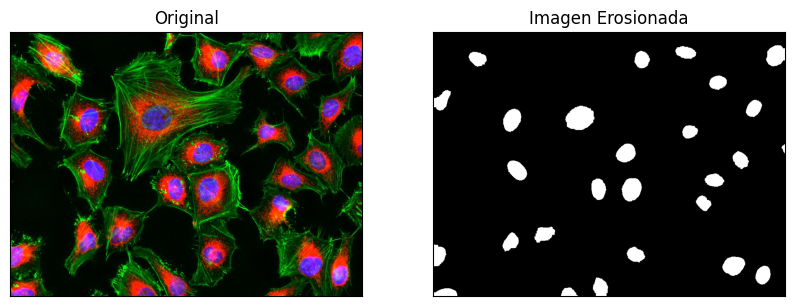

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def varias_plt(img1, img2, cmap='gray'):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(img1, cmap), plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap), plt.title('Imagen Erosionada')
    plt.xticks([]), plt.yticks([])
    plt.show()

def play_opencv():
    if os.path.exists('img_cell.jpg'): 
        img_cell = cv2.imread('img_cell.jpg')
        img_cell = cv2.cvtColor(img_cell, cv2.COLOR_BGR2RGB)

        img_cellR = img_cell[:,:,2]
        _, imgB = cv2.threshold(img_cellR, 90, 255, cv2.THRESH_BINARY)
        kernel = np.ones((13,13), np.uint8)
        kernel1 = np.ones((15,15), np.uint8)
        imaDil = cv2.dilate(imgB, kernel, iterations = 1)
        imaEro = cv2.erode(imaDil,kernel1,iterations = 1)

        contours, _ = cv2.findContours(imaEro, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        num_celulas = len(contours)
        print("Número de células identificadas:", num_celulas)

        varias_plt(img_cell, imaEro, cmap='gray')

    else:
        print('El archivo no existe.')

play_opencv()
